In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"5901cffd98e3fce7636781e4b883dad9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 83% 77.0M/93.0M [00:00<00:00, 137MB/s]
100% 93.0M/93.0M [00:00<00:00, 132MB/s]


In [ ]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


# **DATA**

## **multiprocessing**

In [ ]:
train = pd.read_csv('/content/immo_data.csv')
train

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [ ]:
def outlier(train):
  for co in train.columns:
      if train[co].dtype == 'int64' or train[co].dtype == 'float64':
          upper_lim = train[co].mean() + 3 * train[co].std()
          lower_lim = train[co].mean() - 3 * train[co].std()

          indices = train[(train[co] > upper_lim) | (train[co] < lower_lim)].index
          train = train.drop(indices)
  return train

In [ ]:
gbos = train.groupby('regio1')

In [ ]:
train.regio1.nunique()

16

In [ ]:
len(list(map(outlier, [train for _, train in gbos])))

16

In [ ]:
import time
s_time = time.time()
res_list = list(map(outlier, [train for _, train in gbos]))
print(f'run time : {time.time() - s_time}')

run time : 3.873317241668701


In [ ]:
res_list[1]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
23,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,False,18,4.47,10.0,...,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
28,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,25,7.53,40.0,...,München,Schwabing_West,"Highlights:\n\n * alle Wände der Wohnräume, Kü...",Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,May19
30,Bayern,170.0,floor_heating,ONE_YEAR_FREE,10.0,False,True,15,6.49,2.4,...,Passau,Haidenhof_Süd,WOHNEN UND ENTSPANNEN!\n \nDie Architektur bei...,- Gartenwohnung in bester Lage\n- 2 Zimmer + H...,NaN,NaN,NaN,90.76,0.1985,Sep18
85,Bayern,200.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,11,2.89,10.0,...,Würzburg,Lengfeld,"Helle 4,5-Zimmerwohnung in ruhigem, kleinen Wo...",NaN,NaN,NaN,NaN,NaN,NaN,Oct19
89,Bayern,295.0,central_heating,ONE_YEAR_FREE,NaN,False,True,1,5.14,40.0,...,Kitzingen_Kreis,Kitzingen,"Sie lieben das Besondere, eine Wohnung, die es...","Luxus - Loftwohnung, mit Deckenhöhen von fast ...",NaN,NO_INFORMATION,2018.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268774,Bayern,200.0,central_heating,NaN,NaN,True,True,20,5.64,NaN,...,München_Kreis,Oberschleißheim,Wir vermieten in einer neu erbauten Wohnanlage...,- alle Wohnungen mit hochwertiger Einbauküche ...,NaN,NaN,NaN,NaN,NaN,Feb20
268792,Bayern,310.0,floor_heating,ONE_YEAR_FREE,NaN,True,True,9,6.02,10.0,...,Ansbach_Kreis,Heilsbronn,Für unsere Kunden vermitteln wir provisionsfre...,3-Zimmer-Dachgeschosswohnung mit Balkon und Da...,NaN,NaN,NaN,NaN,NaN,Oct19
268818,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,True,9,6.96,40.0,...,München,Bogenhausen,Die frisch sanierte Wohnung begrüßt Sie mit ei...,- Kellerabteil\n- Bad mit Badewanne und WC\n- ...,175.0,NaN,2019.0,NaN,NaN,May19
268839,Bayern,100.0,district_heating,ONE_YEAR_FREE,10.0,False,True,15,7.43,10.0,...,München,Maxvorstadt,Die sehr liebevoll grundsanierte (2017) Wohnun...,Allgemein:\nvollständig liebevoll grundsaniert...,100.0,NaN,2017.0,90.76,0.1985,Sep18


In [ ]:
from multiprocessing import Pool, cpu_count

In [ ]:
cpu_count()

2

In [ ]:
s_time = time.time()
with Pool(cpu_count()) as p:
    res_list = p.imap(outlier, [train for _, train in gbos])
print(f'run time : {time.time() - s_time}')

run time : 0.6448357105255127


## **First Works**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/immo_data.csv')

In [ ]:
for i in train.columns.to_list():
  nulls = train[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of regio1
0
null datas of serviceCharge
6909
null datas of heatingType
44856
null datas of telekomTvOffer
32619
null datas of telekomHybridUploadSpeed
223830
null datas of newlyConst
0
null datas of balcony
0
null datas of picturecount
0
null datas of pricetrend
1832
null datas of telekomUploadSpeed
33358
null datas of totalRent
40517
null datas of yearConstructed
57045
null datas of scoutId
0
null datas of noParkSpaces
175798
null datas of firingTypes
56964
null datas of hasKitchen
0
null datas of geo_bln
0
null datas of cellar
0
null datas of yearConstructedRange
57045
null datas of baseRent
0
null datas of houseNumber
71018
null datas of livingSpace
0
null datas of geo_krs
0
null datas of condition
68489
null datas of interiorQual
112665
null datas of petsAllowed
114573
null datas of street
0
null datas of streetPlain
71013
null datas of lift
0
null datas of baseRentRange
0
null datas of typeOfFlat
36614
null datas of geo_plz
0
null datas of noRooms
0
null datas of therma

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

## **First Visualization**

In [ ]:
train

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [ ]:
othersregion = list(train['regio2'].value_counts().iloc[20:,].index)
def edit_region(dflist):
    if dflist in othersregion:
        return 'Other'
    else:
        return dflist

train['regio2'] =train['regio2'].apply(edit_region)
train['regio2'].value_counts()

Other                   169239
Leipzig                  13723
Chemnitz                 12575
Berlin                   10406
Dresden                   7522
Magdeburg                 4860
Halle_Saale               4565
München                   4383
Essen                     4351
Frankfurt_am_Main         4296
Hamburg                   3759
Düsseldorf                3711
Duisburg                  3522
Mittelsachsen_Kreis       3162
Dortmund                  3137
Gelsenkirchen             2943
Recklinghausen_Kreis      2754
Köln                      2709
Zwickau                   2536
Wuppertal                 2376
Zwickau_Kreis             2321
Name: regio2, dtype: int64

In [ ]:
regionlist = list(train['regio2'].value_counts().head(25).index)
regionlist # top 20 city that contains the most data counts

['Other',
 'Leipzig',
 'Chemnitz',
 'Berlin',
 'Dresden',
 'Magdeburg',
 'Halle_Saale',
 'München',
 'Essen',
 'Frankfurt_am_Main',
 'Hamburg',
 'Düsseldorf',
 'Duisburg',
 'Mittelsachsen_Kreis',
 'Dortmund',
 'Gelsenkirchen',
 'Recklinghausen_Kreis',
 'Köln',
 'Zwickau',
 'Wuppertal',
 'Zwickau_Kreis']

In [ ]:
train = train[pd.DataFrame(train['regio2'].tolist()).isin(regionlist).any(1).values]
train['regio2'].value_counts()

Other                   169239
Leipzig                  13723
Chemnitz                 12575
Berlin                   10406
Dresden                   7522
Magdeburg                 4860
Halle_Saale               4565
München                   4383
Essen                     4351
Frankfurt_am_Main         4296
Hamburg                   3759
Düsseldorf                3711
Duisburg                  3522
Mittelsachsen_Kreis       3162
Dortmund                  3137
Gelsenkirchen             2943
Recklinghausen_Kreis      2754
Köln                      2709
Zwickau                   2536
Wuppertal                 2376
Zwickau_Kreis             2321
Name: regio2, dtype: int64

In [ ]:
from plotly.offline import init_notebook_mode, iplot
countpie = train['regio2'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "City",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the City ratio in the dataset",
    }
}
iplot(fig)

In [ ]:
import plotly.express as px
rentmean = train.groupby(['regio2'])['totalRent'].mean().sort_index()

fig = px.histogram(x = train['regio2'].value_counts().sort_index().index,
                   y = rentmean,
                   color= train['regio2'].value_counts().sort_index().index
             )
fig.update_xaxes(title="City")
fig.update_yaxes(title = "Average rental per month")
fig.show()

In [ ]:
import plotly.graph_objects as go
plotter = train.groupby('typeOfFlat')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['typeOfFlat'] = plotter.index

data = [
    {
        'x': plotter['typeOfFlat'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['typeOfFlat'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Type of Apartment and Average Rental Cost Per Month", 
                   xaxis=dict(title='Type Of Rental'),
                   yaxis=dict(title='Average rental type cost per month')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



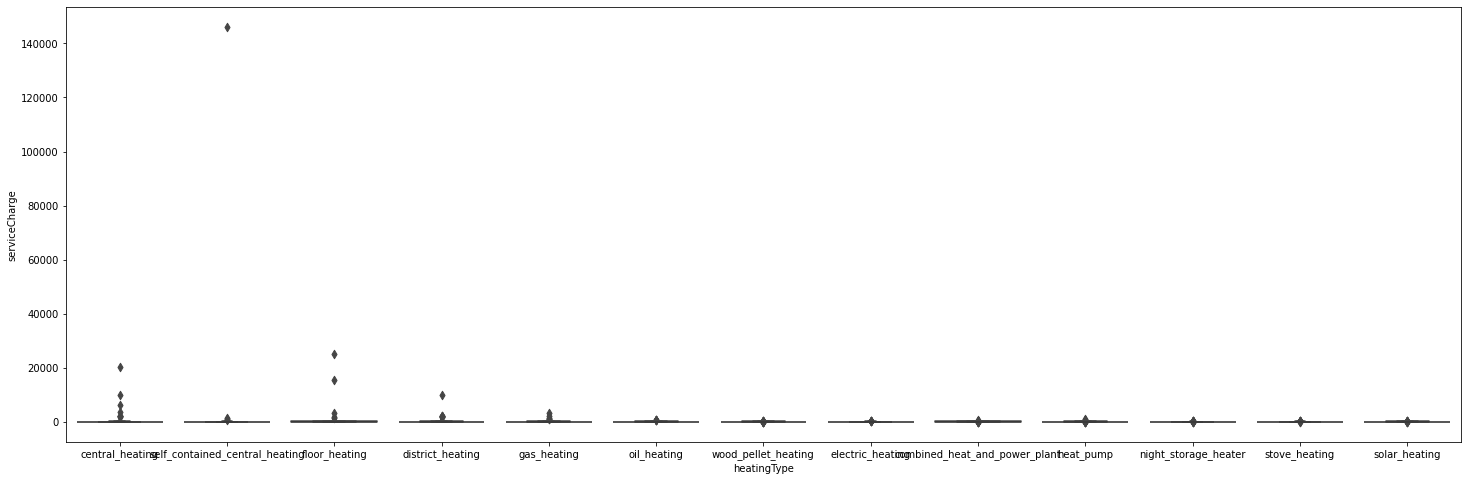

In [ ]:
plt.figure(figsize=(25,8))
sns.boxenplot(train['heatingType'],train['serviceCharge'])

## **Cleaning**

In [ ]:
nulls = train.isnull().sum()
nulls[nulls>0]

serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
noParkSpaces                175798
firingTypes                  56964
yearConstructedRange         57045
houseNumber                  71018
condition                    68489
interiorQual                112665
petsAllowed                 114573
streetPlain                  71013
typeOfFlat                   36614
thermalChar                 106506
floor                        51309
numberOfFloors               97732
description                  19747
facilities                   52924
heatingCosts                183332
energyEfficiencyClass       191063
lastRefurbish               188139
electricityBasePrice        222004
electricityKwhPrice         222004
dtype: int64

In [ ]:
drop_columns=[]
nulls=train.isnull().sum()
for i,j in enumerate(nulls):
  if(j>150000):
    drop_columns.append(i)
len(drop_columns)

7

In [ ]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train.columns[i])
train.drop(columns=drop_columns_name, inplace=True)
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,NaN,NaN,3,False,4,Other,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,1.0,NaN,3,False,4,Other,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,...,NaN,NaN,3,False,4,Other,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,...,1.0,1.0,3,False,5,Other,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,...,1.0,2.0,4,True,4,Other,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,...,NaN,5.0,2,False,3,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [ ]:
train = train.drop(columns=['scoutId','houseNumber' , 'street','streetPlain','description', 'facilities','date'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,67459,3.0,NaN,NaN,NaN,3,False,4,Other,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,28213,3.0,188.90,1.0,NaN,3,False,4,Other,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,...,82390,3.0,NaN,NaN,NaN,3,False,4,Other,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,...,68519,3.5,NaN,1.0,1.0,3,False,5,Other,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,...,65552,4.0,160.77,1.0,2.0,4,True,4,Other,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,...,51069,2.0,24.70,NaN,5.0,2,False,3,Köln,Dellbrück


In [ ]:
#delete_index = train[train['serviceCharge'].isna()].index
#train.drop(index = delete_index, inplace=True)

In [ ]:
#train.drop(labels=['telekomHybridUploadSpeed' , 'R_emaildomain'], axis=1, inplace=True)

In [ ]:
#train.heatingType.fillna(train.heatingType.mode()[0] , inplace=True)

In [ ]:
#label : telekomTvOffer
#heatingType


In [ ]:
#plt.figure(figsize=(20,8))

#sns.countplot(train['heatingType'])

In [ ]:
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        print('column : {} , unique values : {}'.format(cols,train[cols].nunique()))

column : regio1 , unique values : 16
column : heatingType , unique values : 13
column : telekomTvOffer , unique values : 3
column : newlyConst , unique values : 2
column : balcony , unique values : 2
column : firingTypes , unique values : 132
column : hasKitchen , unique values : 2
column : geo_bln , unique values : 16
column : cellar , unique values : 2
column : geo_krs , unique values : 419
column : condition , unique values : 10
column : interiorQual , unique values : 4
column : petsAllowed , unique values : 3
column : lift , unique values : 2
column : typeOfFlat , unique values : 10
column : garden , unique values : 2
column : regio2 , unique values : 21
column : regio3 , unique values : 8684


In [ ]:
train = train.drop(columns = ['firingTypes','geo_krs','regio2','regio3'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,2,other,9599,3.0,86.00,3.0,NaN,3,False,2
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,...,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,...,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,...,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,...,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,3


In [ ]:
#train.serviceCharge.fillna(train.serviceCharge.mode()[0] , inplace=True)
#train.pricetrend.fillna(train.pricetrend.mode()[0] , inplace=True)
#train.telekomUploadSpeed.fillna(train.telekomUploadSpeed.mode()[0] , inplace=True)
#train.totalRent.fillna(train.totalRent.mode()[0] , inplace=True)
#train.yearConstructedRange.fillna(train.yearConstructedRange.mode()[0] , inplace=True)
#train.yearConstructed.fillna(train.yearConstructed.mode()[0] , inplace=True)
#train.thermalChar.fillna(train.thermalChar.mode()[0] , inplace=True)
#train.floor.fillna(train.floor.mode()[0] , inplace=True)
#train.numberOfFloors.fillna(train.numberOfFloors.mode()[0] , inplace=True)
#train.info()

In [ ]:
train._get_numeric_data().dtypes
train.fillna(train._get_numeric_data().mean(),inplace = True)

In [ ]:
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,...,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,...,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,...,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,...,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,...,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,...,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.804928,1150.000000,...,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,...,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,28.804928,1015.000000,...,6,apartment,51069,2.0,24.700000,2.122405,5.000000,2,False,3


In [ ]:
for co in train.columns:
    if train[co].dtype == 'int64' or train[co].dtype == 'float64':
        upper_lim = train[co].mean() + 3 * train[co].std()
        lower_lim = train[co].mean() - 3 * train[co].std()
        
        indices = train[(train[co] > upper_lim) | (train[co] < lower_lim)].index
        train = train.drop(indices)

In [ ]:
train.shape

(258567, 31)

In [ ]:
for cols in train.columns:
    if train[cols].dtype == 'int64' or train[cols].dtype == 'float64':
        if cols != 'livingSpace':
            #train[cols] = ((train[cols] - min(train[cols]))/(max(train[cols]) - min(train[cols])))
            train[cols] = ((train[cols] - train[cols].mean())/(train[cols].std()))

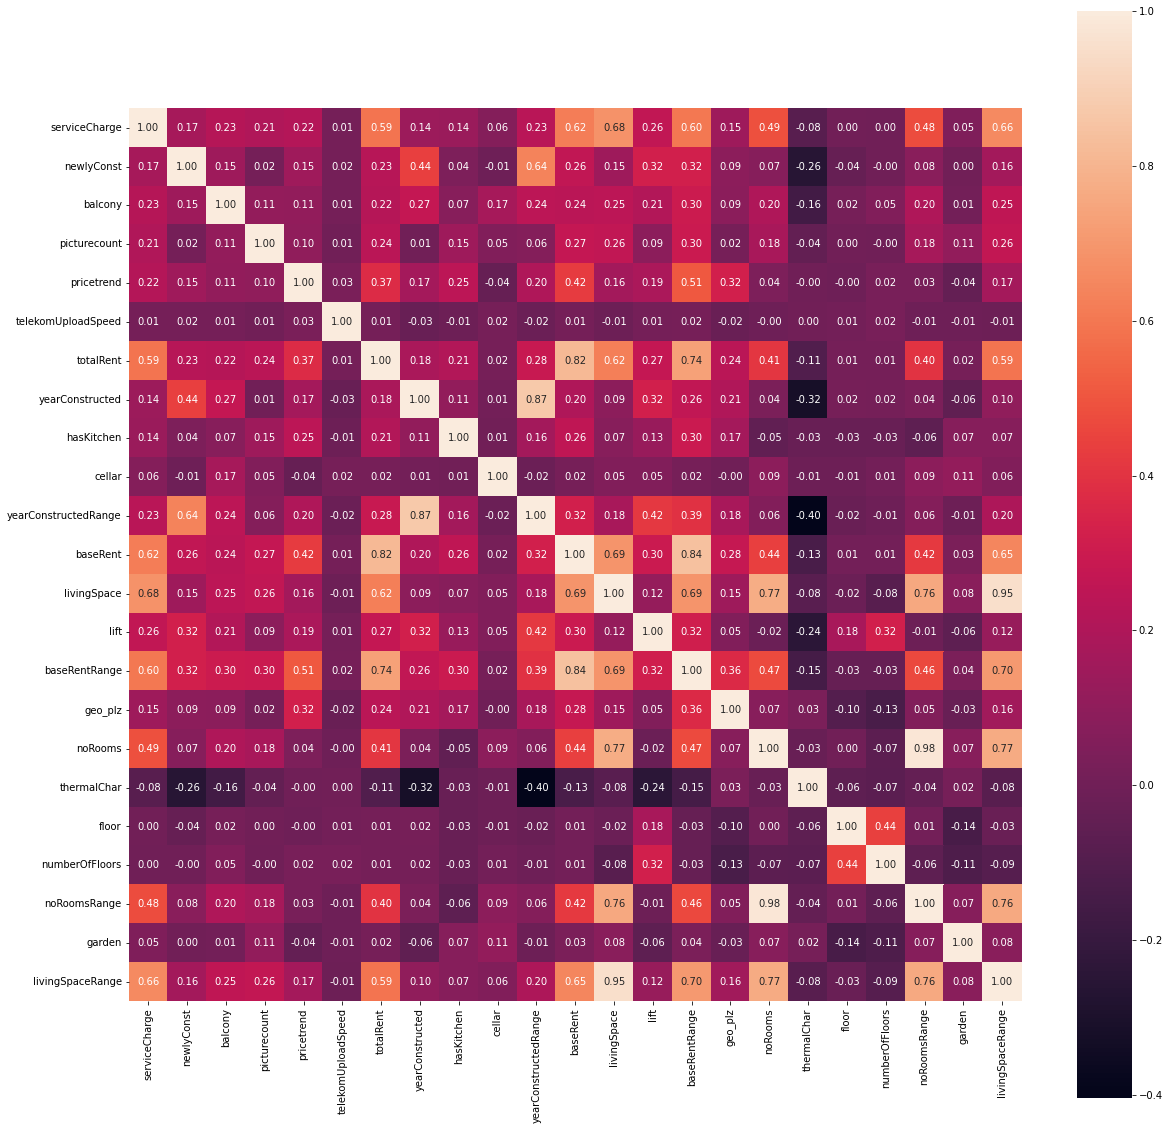

In [ ]:
correlation = train.corr()
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlation, square = True,fmt='.2f' ,annot = True)

In [ ]:
categorical_columns = []
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
categorical_columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden']

In [ ]:
temp = pd.get_dummies(train[categorical_columns])

In [ ]:
train = pd.concat([train, temp], axis=1)
train = train.drop(columns = categorical_columns)
train

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,1.182833,-0.616990,0.698092,-1.234524,0.045552,-0.088239,-0.716351,-0.083496,86.00,0.127524,...,0,1,0,0,0,0,0,0,0,0
1,-0.181795,-0.259074,0.079636,-1.234524,0.161787,-2.875390,-1.129501,0.334331,89.00,0.583179,...,0,1,0,0,0,0,0,0,0,0
2,1.305773,-0.259074,-0.323704,-1.734112,0.917339,1.512890,2.175701,0.670631,83.80,1.038835,...,1,0,0,0,0,0,0,0,0,0
3,-1.114291,-0.080116,-0.963671,0.737533,0.161787,-0.117890,-0.716351,-0.597118,58.15,-0.783787,...,0,0,0,0,0,1,0,0,0,0
4,-0.132619,1.709464,-0.463529,0.001622,0.164949,-0.532998,-1.129501,0.262995,84.97,0.583179,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,-0.722729,-1.690738,-0.312949,-1.234524,0.178215,1.423938,2.175701,0.375095,90.00,1.038835,...,0,0,0,0,0,0,0,0,1,0
268846,0.875485,0.456758,1.703754,0.001622,0.633061,0.445470,0.109949,0.599295,115.00,1.038835,...,1,0,0,0,0,0,0,0,0,0
268847,0.875485,2.067380,-0.226903,0.737533,0.216119,-0.088239,-0.716351,0.028604,95.00,0.583179,...,1,0,0,0,0,0,0,0,0,0
268848,0.322257,1.172590,0.574400,0.001622,0.377210,1.512890,2.175701,0.415858,70.00,1.038835,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258567 entries, 0 to 268849
Data columns (total 92 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   serviceCharge                                 258567 non-null  float64
 1   picturecount                                  258567 non-null  float64
 2   pricetrend                                    258567 non-null  float64
 3   telekomUploadSpeed                            258567 non-null  float64
 4   totalRent                                     258567 non-null  float64
 5   yearConstructed                               258567 non-null  float64
 6   yearConstructedRange                          258567 non-null  float64
 7   baseRent                                      258567 non-null  float64
 8   livingSpace                                   258567 non-null  float64
 9   baseRentRange                                 25

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



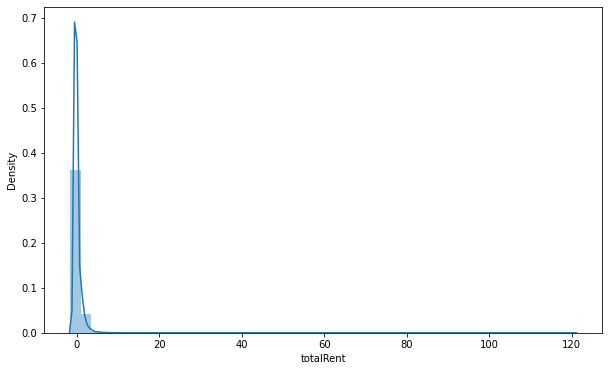

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(train['totalRent'])

# **Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
y = pd.DataFrame(train['totalRent'])
train = train.drop('totalRent', axis=1, inplace=False)
x = train.values
x1 = pd.DataFrame(train['baseRent'])

In [ ]:
y = train['totalRent'].values
train = train.drop('totalRent', axis=1, inplace=False)
x = train.values
x1 = train['baseRent'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x1 = sc.fit_transform(x1)
y = sc.fit_transform(y)

## **any feautre(ALL)**

In [ ]:
reg3 = LinearRegression()

reg3.fit(x,y)

LinearRegression()

In [ ]:
reg3_MSE_5fold = cross_val_score(reg3 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg3_MSE_10fold = cross_val_score(reg3 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg3_MSE_5fold) , '\n')
print(abs(reg3_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg3_MSE_5fold)), abs(np.mean(reg3_MSE_10fold))))

[0.44433006 0.15270514 0.16665435 0.5684494  0.26893708] 

[0.68924895 0.19688413 0.14441661 0.15943091 0.16532891 0.16566085
 0.35538653 0.75607242 0.35227723 0.18476389] 

mean MSE in five_cv_scores is 0.32 and in ten_cv_scores is 0.32


In [ ]:
reg3_Acc_5fold = cross_val_score(reg3 , x, y ,cv = 5)
reg3_Acc_10fold = cross_val_score(reg3 , x ,y, cv = 10)

print(reg3_Acc_5fold , '\n')
print(reg3_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg3_Acc_5fold) * 100, np.mean(reg3_Acc_10fold) * 100) )

[0.61245728 0.82065109 0.81242476 0.50442314 0.72131399] 

[0.51597127 0.77345672 0.82260128 0.8205663  0.81155704 0.81583826
 0.5958925  0.46554074 0.6781764  0.7788232 ] 

mean acuuracy in five_cv_scores is 69.43% and in ten_cv_scores is 70.78%


## **With Package - 1 Feature**

In [ ]:
reg1 = LinearRegression()
x1 = x1.reshape(-1,1)
reg1.fit(x1,y)

LinearRegression()

In [ ]:
reg1_MSE_5fold = cross_val_score(reg1 , x1, y , scoring='neg_mean_squared_error',cv = 5)
reg1_MSE_10fold = cross_val_score(reg1 , x1, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg1_MSE_5fold) , '\n')
print(abs(reg1_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg1_MSE_5fold)), abs(np.mean(reg1_MSE_10fold))))

[0.44882938 0.16114914 0.17207854 0.61195107 0.27597279] 

[0.69317416 0.2029282  0.15272151 0.16862021 0.17170213 0.17171629
 0.43605926 0.77956779 0.3550955  0.19662443] 

mean MSE in five_cv_scores is 0.33 and in ten_cv_scores is 0.33


In [ ]:
reg1_Acc_5fold = cross_val_score(reg1 , x1, y ,cv = 5)
reg1_Acc_10fold = cross_val_score(reg1 , x1 ,y, cv = 10)

print(reg1_Acc_5fold , '\n')
print(reg1_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg1_Acc_5fold) * 100, np.mean(reg1_Acc_10fold) * 100) )

[0.60853147 0.81073307 0.8063189  0.46649611 0.71402213] 

[0.51321289 0.76650125 0.81239897 0.81022335 0.80429205 0.80910581
 0.50415819 0.44892999 0.67560051 0.76462429] 

mean acuuracy in five_cv_scores is 68.12% and in ten_cv_scores is 69.09%


## **RIDGE**

In [ ]:
from sklearn.linear_model import Ridge

reg4 = Ridge(alpha=0.1, normalize=True)
reg4.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.1, normalize=True)

In [ ]:
reg4_MSE_5fold = cross_val_score(reg4 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg4_MSE_10fold = cross_val_score(reg4 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg4_MSE_5fold) , '\n')
print(abs(reg4_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg4_MSE_5fold)), abs(np.mean(reg4_MSE_10fold))) )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

[0.45779719 0.16465054 0.17946211 0.51374912 0.2808349 ] 

[0.70487089 0.20847297 0.15593507 0.17176547 0.17772737 0.17908425
 0.26769603 0.75794464 0.36925088 0.19138048] 

mean MSE in five_cv_scores is 0.32 and in ten_cv_scores is 0.32


In [ ]:

reg4_Acc_5fold = cross_val_score(reg4 , x, y ,cv = 5)
reg4_Acc_10fold = cross_val_score(reg4 , x ,y, cv = 10)

print(reg4_Acc_5fold , '\n')
print(reg4_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg4_Acc_5fold)*100 , np.mean(reg4_Acc_10fold)*100 ) )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

[0.60070976 0.80662073 0.7980084  0.55210937 0.70898375] 

[0.50499876 0.76012117 0.80845148 0.80668346 0.79742442 0.80091497
 0.69560356 0.46421522 0.66266878 0.77090174] 

mean acuuracy in five_cv_scores is 69.33% and in ten_cv_scores is 70.72%


## **LASSO**

In [ ]:
from sklearn.linear_model import Lasso

reg5 = Lasso(alpha=0.0001, normalize=True)
reg5.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=0.0001, normalize=True)

In [ ]:
reg5_MSE_5fold = cross_val_score(reg5 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg5_MSE_10fold = cross_val_score(reg5 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg5_MSE_5fold) , '\n')
print(abs(reg5_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg5_MSE_5fold)), abs(np.mean(reg5_MSE_10fold))) )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

[0.45098164 0.15880676 0.17209155 0.56686968 0.27375045] 

[0.69683091 0.20333287 0.15043183 0.16639447 0.17038452 0.1725103
 0.35449424 0.76050062 0.35912331 0.18835037] 

mean MSE in five_cv_scores is 0.32 and in ten_cv_scores is 0.32


In [ ]:

reg5_Acc_5fold = cross_val_score(reg5 , x, y ,cv = 5)
reg5_Acc_10fold = cross_val_score(reg5 , x, y, cv = 10)

print(reg5_Acc_5fold , '\n')
print(reg5_Acc_10fold , '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg5_Acc_5fold)*100 , np.mean(reg5_Acc_10fold)*100 ) )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

[0.60665427 0.81348416 0.80630425 0.50579844 0.71632505] 

[0.51064491 0.76603561 0.81521158 0.81272835 0.80579388 0.80822312
 0.59690555 0.46240842 0.67192088 0.77452903] 

mean acuuracy in five_cv_scores is 68.97% and in ten_cv_scores is 70.24%
